<a href="https://colab.research.google.com/github/cbermudez13/eel4815_final_coding_assignment/blob/main/group_1_problem_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [109]:
# Assume that the output of a NN is given as h(x) = w^T x
number_of_features = 5
weights_vector_w = np.transpose(np.array([-0.2, -0.4, 0, 0.4, 0.2]))

print("The shape of the weight vector is = ", weights_vector_w.shape)
print("The weight vector is = ", weights_vector_w)

The shape of the weight vector is =  (5,)
The weight vector is =  [-0.2 -0.4  0.   0.4  0.2]


# Test sample a

In [110]:
# Assume that we have a testing data point given along with its true label:
np.random.seed(seed=3)
#x_test_sample = np.random.normal(loc = 0.0, scale=0.1, size=(number_of_features,))
a_test_sample = np.transpose(np.array([-0.04046774, -0.05453599, -0.15464773, 0.09823674, -0.11010676]))
b_test_sample = np.transpose(np.array([0.07450563, 0.19761108, -0.12441233, -0.06264169, -0.08037661]))
# we can infer the predicted label by first computing the output as
output_h = np.dot(a_test_sample,weights_vector_w)

# use a signum function or a logic to get the preducted label as
predicted_label = np.sign(output_h)

# we can define a prediction model that returns the output_value, and the predicted label
def pred_model(weights_vector, input_sample):
  output_h = np.dot(input_sample,weights_vector)
  predicted_label = np.sign(output_h)
  return output_h, predicted_label
  

print("The a test sample is ", a_test_sample)
print("The a test sample output is ", [output_h])
print("The a test sample predicted label is ", [predicted_label])

The a test sample is  [-0.04046774 -0.05453599 -0.15464773  0.09823674 -0.11010676]
The a test sample output is  [0.04718128800000001]
The a test sample predicted label is  [1.0]


Next, we use $\eta = -y~\epsilon~\text{sign}(w)$ to fool the network w.r.t. the test example. We will use different values of $\epsilon$ to induce the label changing.

In [111]:
# define some range of values for the allowed perturbations
eps_range = np.arange(0.001,0.50, 0.001)
bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)
output_h_adv_save = []
predicted_label_adv_save = []
loss_adv_save = []
for eps in eps_range:

  # obtain the adversarial example: 
  a_test_sample_adv = a_test_sample - predicted_label * eps * np.sign(weights_vector_w)

  # obtain the predicted label for the perturbed example x_adv
  output_h_adv, predicted_label_adv = pred_model(weights_vector = weights_vector_w, input_sample = a_test_sample_adv)
  predicted_label_adv_save.append(predicted_label_adv)
  output_h_adv_save.append(output_h_adv)

  bce_loss = bce(output_h_adv_save, predicted_label_adv_save).numpy()
  loss_adv_save.append(bce_loss)

  print("predicted label {} predicted label with perturbations = {}. Bound = {}. Output value = {}. Output value adv {}".format(predicted_label,predicted_label_adv, eps, round(output_h,2), round(output_h_adv,2)))


predicted label 1.0 predicted label with perturbations = 1.0. Bound = 0.001. Output value = 0.05. Output value adv 0.05
predicted label 1.0 predicted label with perturbations = 1.0. Bound = 0.002. Output value = 0.05. Output value adv 0.04
predicted label 1.0 predicted label with perturbations = 1.0. Bound = 0.003. Output value = 0.05. Output value adv 0.04
predicted label 1.0 predicted label with perturbations = 1.0. Bound = 0.004. Output value = 0.05. Output value adv 0.04
predicted label 1.0 predicted label with perturbations = 1.0. Bound = 0.005. Output value = 0.05. Output value adv 0.04
predicted label 1.0 predicted label with perturbations = 1.0. Bound = 0.006. Output value = 0.05. Output value adv 0.04
predicted label 1.0 predicted label with perturbations = 1.0. Bound = 0.007. Output value = 0.05. Output value adv 0.04
predicted label 1.0 predicted label with perturbations = 1.0. Bound = 0.008. Output value = 0.05. Output value adv 0.04
predicted label 1.0 predicted label with

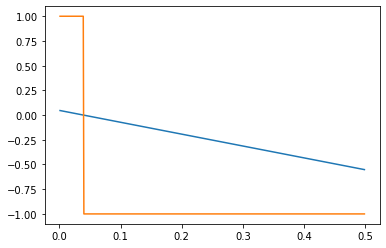

In [112]:
# Next, lets plot and obtain the epsilon that causes the damage...
# plot the data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(eps_range, output_h_adv_save, color='tab:blue')
ax.plot(eps_range, predicted_label_adv_save, color='tab:orange')
plt.show()

# Binary cross-entropy loss function curve

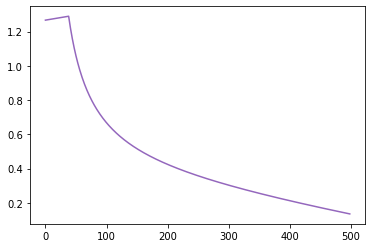

In [113]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(loss_adv_save, color='tab:purple')
plt.show()

In [114]:
idx = np.argwhere(np.diff(np.sign(np.array(output_h_adv_save) - np.array(predicted_label_adv_save)))).flatten()
print('The intersection of these two plots is: ')
print(eps_range[idx])

The intersection of these two plots is: 
[0.039]


We chose the minimum pertubations by looking at the intersection of the output h adverserial plot (label blue) and the predicted label adversarial plot (label orange). The pertubation value is calculated to be 0.039

# Test sample b


In [115]:
# Assume that we have a testing data point given along with its true label:
np.random.seed(seed=3)
#x_test_sample = np.random.normal(loc = 0.0, scale=0.1, size=(number_of_features,))
b_test_sample = np.transpose(np.array([0.07450563, 0.19761108, -0.12441233, -0.06264169, -0.08037661]))
# we can infer the predicted label by first computing the output as
output_h = np.dot(b_test_sample,weights_vector_w)

# use a signum function or a logic to get the preducted label as
predicted_label = np.sign(output_h)

# we can define a prediction model that returns the output_value, and the predicted label
def pred_model(weights_vector, input_sample):
  output_h = np.dot(input_sample,weights_vector)
  predicted_label = np.sign(output_h)
  return output_h, predicted_label
  

print("The a test sample is ", b_test_sample)
print("The a test sample output is ", [output_h])
print("The a test sample predicted label is ", [predicted_label])

The a test sample is  [ 0.07450563  0.19761108 -0.12441233 -0.06264169 -0.08037661]
The a test sample output is  [-0.135077556]
The a test sample predicted label is  [-1.0]


In [116]:
# define some range of values for the allowed perturbations
eps_range = np.arange(0.001,0.50, 0.001)

output_h_adv_save = []
predicted_label_adv_save = []
for eps in eps_range:

  # obtain the adversarial example: 
  b_test_sample_adv = b_test_sample - predicted_label * eps * np.sign(weights_vector_w)

  # obtain the predicted label for the perturbed example x_adv
  output_h_adv, predicted_label_adv = pred_model(weights_vector = weights_vector_w, input_sample = b_test_sample_adv)
  predicted_label_adv_save.append(predicted_label_adv)
  output_h_adv_save.append(output_h_adv)

  print("predicted label {} predicted label with perturbations = {}. Bound = {}. Output value = {}. Output value adv {}".format(predicted_label,predicted_label_adv, eps, round(output_h,2), round(output_h_adv,2)))


predicted label -1.0 predicted label with perturbations = -1.0. Bound = 0.001. Output value = -0.14. Output value adv -0.13
predicted label -1.0 predicted label with perturbations = -1.0. Bound = 0.002. Output value = -0.14. Output value adv -0.13
predicted label -1.0 predicted label with perturbations = -1.0. Bound = 0.003. Output value = -0.14. Output value adv -0.13
predicted label -1.0 predicted label with perturbations = -1.0. Bound = 0.004. Output value = -0.14. Output value adv -0.13
predicted label -1.0 predicted label with perturbations = -1.0. Bound = 0.005. Output value = -0.14. Output value adv -0.13
predicted label -1.0 predicted label with perturbations = -1.0. Bound = 0.006. Output value = -0.14. Output value adv -0.13
predicted label -1.0 predicted label with perturbations = -1.0. Bound = 0.007. Output value = -0.14. Output value adv -0.13
predicted label -1.0 predicted label with perturbations = -1.0. Bound = 0.008. Output value = -0.14. Output value adv -0.13
predicte

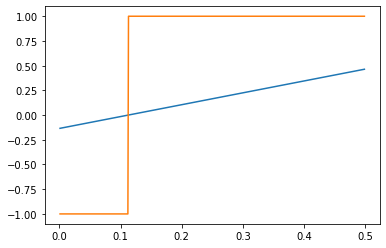

In [117]:
# Next, lets plot and obtain the epsilon that causes the damage...
# plot the data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(eps_range, output_h_adv_save, color='tab:blue')
ax.plot(eps_range, predicted_label_adv_save, color='tab:orange')
plt.show()

# Binary Cross-Entropy Loss Function


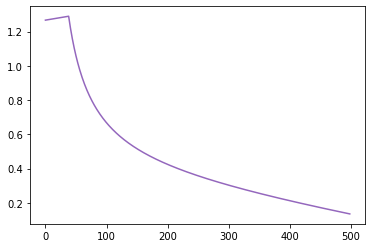

In [118]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(loss_adv_save, color='tab:purple')
plt.show()

In [119]:
idx = np.argwhere(np.diff(np.sign(np.array(output_h_adv_save) - np.array(predicted_label_adv_save)))).flatten()
print('The intersection of these two plots in first chart is: ')
print(eps_range[idx])

The intersection of these two plots in first chart is: 
[0.112]


We chose the minimum pertubations by looking at the intersection of the output h adverserial plot (label blue) and the predicted label adversarial plot (label orange). The pertubation value is calculated to be 0.112